In [328]:
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split
import data_generation as dg
from metrics import ece
from metrics import true_ece
from metrics import fce
import scipy.stats as st
import numpy as np
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [329]:
dist1_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist1_2 = st.multivariate_normal(mean=[-10, 10], cov=1.7, allow_singular=True)

In [330]:
dist2_1 = st.multivariate_normal(mean=[-10, -10], cov=1.4, allow_singular=True)
dist2_2 = st.multivariate_normal(mean=[10, -10], cov=0.68, allow_singular=True)

In [331]:
class_object1 = dg.ClassObject([dist1_1, dist1_2], None)
class_object2 = dg.ClassObject([dist2_1, dist2_2], None)

In [332]:
test = dg.DataGeneration([class_object1, class_object2], n_uninformative_features=0, title="dg-test")

In [333]:
n_samples_per_class_and_dist = [
    [100, 100],
    [100, 100]
]

samples, labels = test.generate_data(n_samples_per_class_and_dist)

In [334]:
print(np.shape(labels))

(400,)


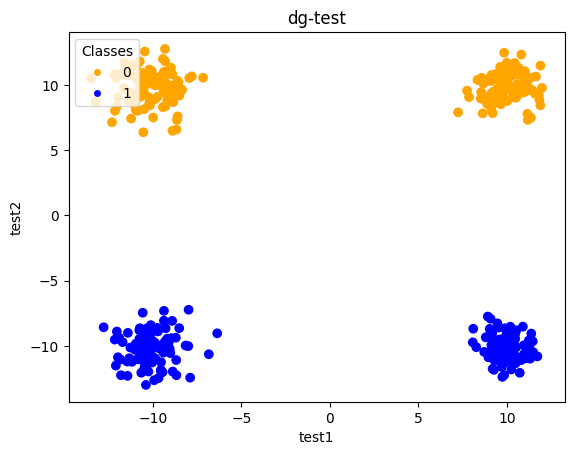

<module 'matplotlib.pyplot' from 'D:\\ProgrammingProjects\\PyCharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [355]:
colormap = np.array(['orange', 'blue', 'red'])

test.scatter2d(0, 1, colormap=colormap, show=True, axis1_label="test1", axis2_label="test2")

In [336]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels)

In [337]:
print(np.shape(labels))

(400,)


In [338]:
print(np.shape(y_test))

(100,)


In [339]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [340]:
print(y_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [341]:
model = tf.keras.Sequential()

In [342]:
model.add(tf.keras.layers.Dense(600, activation="tanh"))

In [343]:
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [344]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [345]:
model.fit(X_train.reshape(-1, 2), y_train, epochs=15, batch_size=1000)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step - accuracy: 0.5267 - loss: 0.5398
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0686
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0400
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0311
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0253
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0212
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0181
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0157
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0137
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0122
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0109
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0097


In [346]:
model.evaluate(X_test.reshape(-1, 2), y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0071  


[0.007435985840857029, 1.0]

In [347]:
predictions = model.predict(X_test.reshape(-1,2))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [348]:
print(np.shape(y_test))

(100, 2)


In [349]:
y_test = np.argmax(y_test, axis=1)

In [350]:
print(y_test)

[1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1]


In [351]:
ece.ece(predictions, y_test, n_bins=10)

array([0.00692618])

In [352]:
fce.fuzzy_calibration_error(y_test, predictions, n_bins=10)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.007459226782173478], 0.007)

In [353]:
p_test_true = np.array([[test.cond_prob(x, k=0), test.cond_prob(x, k=1)] for x in X_test])

In [354]:
true_ece.true_ece(predictions, p_test_true)

array([0.00692624, 0.00692624])